## Import python libraries

In [1]:
import pandas as pd                           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler

## Load the dataset in the csv file into data

In [2]:
data = pd.read_csv('healthcare_dataset.csv')
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


## Convert the data into DataFrame

In [3]:
df = pd.DataFrame(data)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


## Display first 3 entries in the DataFrame 

In [4]:
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


## Display last 3 entries in the DataFrame

In [5]:
df.tail(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


## Display total number of rows and columns in the DataFrame

In [6]:
df.shape

(55500, 15)

## Display total number of Elements in the DataFrame

In [7]:
df.size

832500

## Series of labels that identify each row.

In [8]:
df.index

RangeIndex(start=0, stop=55500, step=1)

## List the columns in the DataFrame

In [9]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

## Provides information about the DataFrame 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## Display data type of all columns in the DataFrame

In [11]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

## Descriptive Analysis

### Provides Statistical measures for the numerical columns

In [12]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### Mean

In [13]:
a = df['Age'].mean()
a

51.53945945945946

### Median

In [14]:
b = df['Age'].median()
b

52.0

### Standard Deviation

In [15]:
st = df['Age'].std()
st

19.602453808513932

## Data Cleaning

### Check for total number of null values 
- A missing or unknown value

In [16]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Check nan values 
- An undefined value or value that cannot be represented, especially results of floating-point calculations.

In [17]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Check for Duplicate Values

In [18]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55495    False
55496    False
55497    False
55498    False
55499    False
Length: 55500, dtype: bool

In [19]:
df.duplicated().sum()

534

### Handling the duplicate values

In [20]:
df.drop_duplicates()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### Value Counts of each value in a column

In [21]:
med_cond = df['Medical Condition'].value_counts()
print(med_cond)

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


### Finding the range of values using unique function

In [22]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [23]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [24]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [25]:
df['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [26]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [27]:
df['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [28]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

## REPLACING COLUMN VALUES

In [135]:
df.replace({'Gender':{'Male' : 1, 'Female' : 2}}, inplace = True)

In [136]:
df.replace({'Blood Type':{'A+' : 1, 'A-' : 2, 'B+' : 3, 'B-' : 4, 'AB+' : 5, 'AB-': 6, 'O+' : 7, 'O-' : 8}}, inplace=True)

In [137]:
df.replace({'Admission Type':{'Elective' : 1, 'Urgent' : 2, 'Emergency' : 3}}, inplace=True)

In [138]:
df.replace({'Medication':{'Lipitor' : 1, 'Ibuprofen' : 2, 'Aspirin' : 3, 'Paracetamol' : 4, 'Penicillin' : 5}}, inplace=True)

In [139]:
df.replace({'Test Results':{'Abnormal' : 1, 'Normal' : 2, 'Inconclusive' : 3}}, inplace = True)

In [140]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,17,1,4,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18148,328,2,2024-02-02,4,2
1,LesLie TErRy,49,1,1,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33218,265,3,2019-08-26,2,3
2,DaNnY sMitH,63,2,2,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27375,205,3,2022-10-07,3,2
3,andrEw waTtS,15,2,7,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37562,450,1,2020-12-18,2,1
4,adrIENNE bEll,30,2,5,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,13517,458,2,2022-10-09,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,29,2,7,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,1660,417,1,2020-09-15,5,1
55496,KYle pEREz,48,2,6,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31014,316,1,2020-02-01,3,2
55497,HEATher WaNG,25,2,3,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27043,347,2,2020-08-10,2,1
55498,JENniFER JOneS,30,1,8,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32001,321,1,2019-05-31,2,1


## Matplotlib charts
### Line Plot

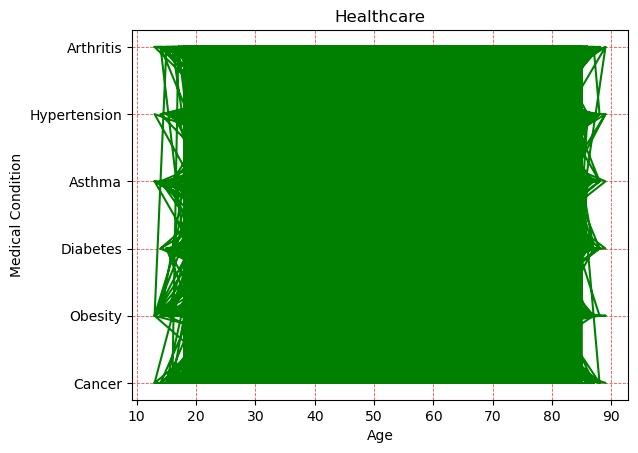

In [35]:
plt.plot(df['Age'], df['Medical Condition'], color='green')
plt.title('Healthcare')
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.grid(True, linestyle='--', linewidth=0.6, color='red', alpha=0.7)
plt.show()

### Histogram

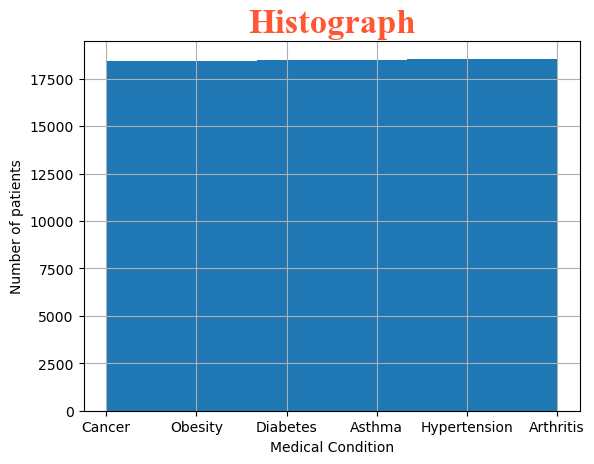

In [36]:
plt.hist(df['Medical Condition'], bins = 3)
plt.title('Histograph', fontdict={'fontsize':25,'fontname':'Times New Roman','fontweight':'bold','color': '#FF5733'})
plt.xlabel('Medical Condition')
plt.ylabel('Number of patients')
plt.grid(True)
plt.show()

### Bar Chart

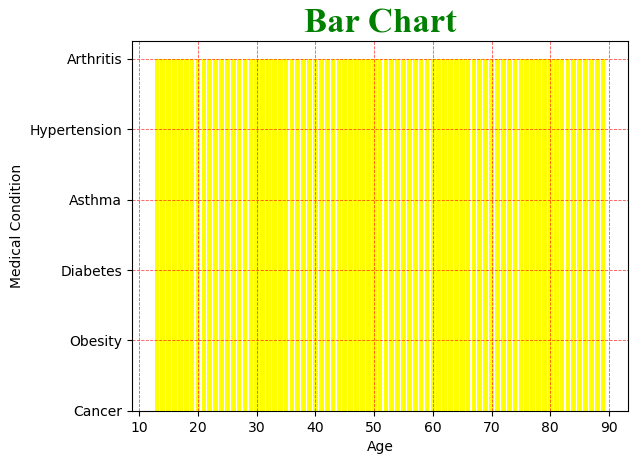

In [37]:
plt.bar(df['Age'], df['Medical Condition'], color='yellow')
plt.title('Bar Chart', fontdict={'fontsize':25,'fontname':'Times New Roman','fontweight':'bold','color': 'green'})
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.grid(True, linestyle='--', linewidth=0.6, color='red', alpha=0.7)
plt.show()

### Scatter Plot

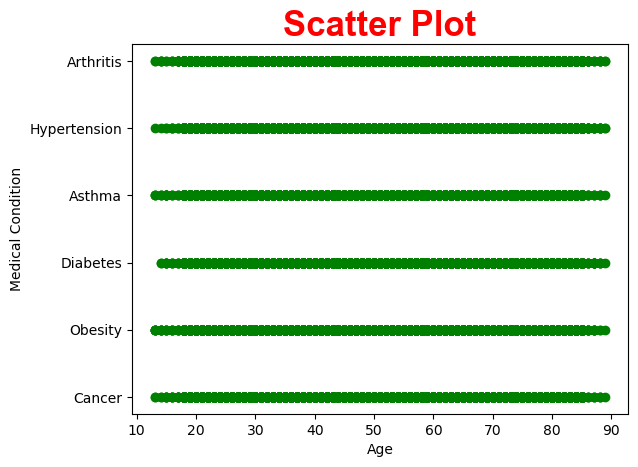

In [38]:
plt.scatter(df['Age'], df['Medical Condition'], color='green')
plt.title('Scatter Plot', fontdict={'fontsize':25,'fontname':'Arial','fontweight':'bold','color': 'red'})
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.show()

### Pie Chart

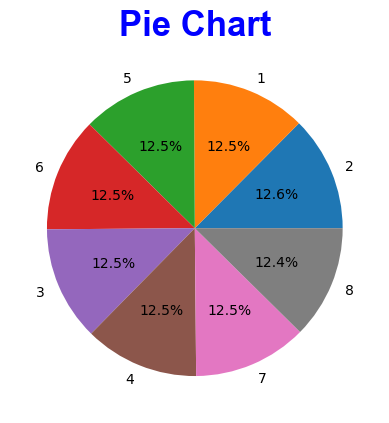

<Figure size 800x500 with 0 Axes>

In [39]:
bt_count = df['Blood Type'].value_counts()
plt.pie(bt_count,labels=bt_count.index, autopct = '%1.1f%%')
plt.title('Pie Chart', fontdict={'fontsize':25,'fontname':'Arial','fontweight':'bold','color': 'blue'})
plt.figure(figsize=(8,5))
plt.show()

## Seaborn charts
### Line Plot

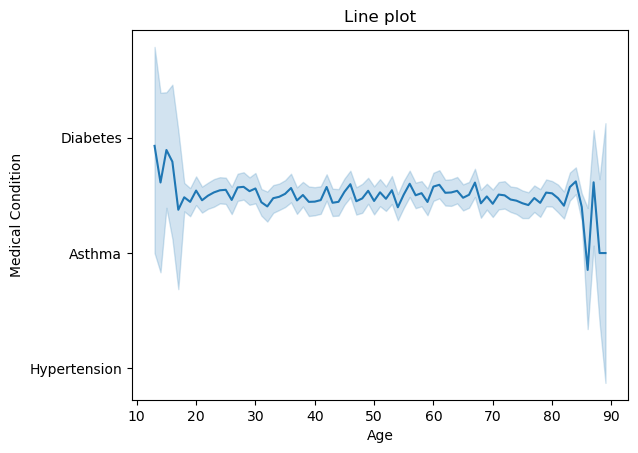

In [40]:
sns.lineplot(x=df['Age'], y=df['Medical Condition'], data=df)
plt.title('Line plot')
plt.show()

### Scatter plot

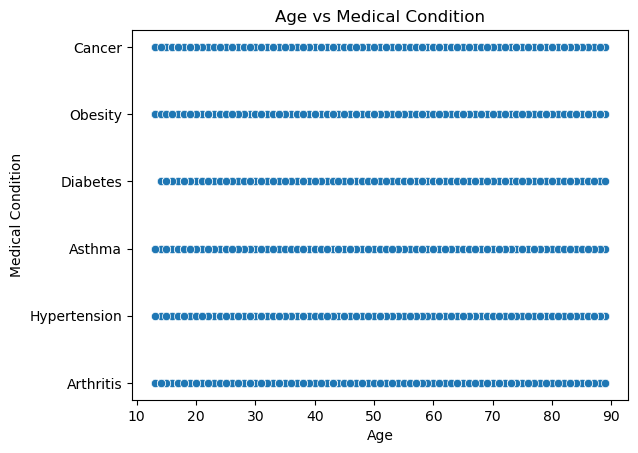

In [41]:
sns.scatterplot(x=df['Age'], y=df['Medical Condition'], data=df)
plt.title('Age vs Medical Condition')
plt.show()

### Bar plot

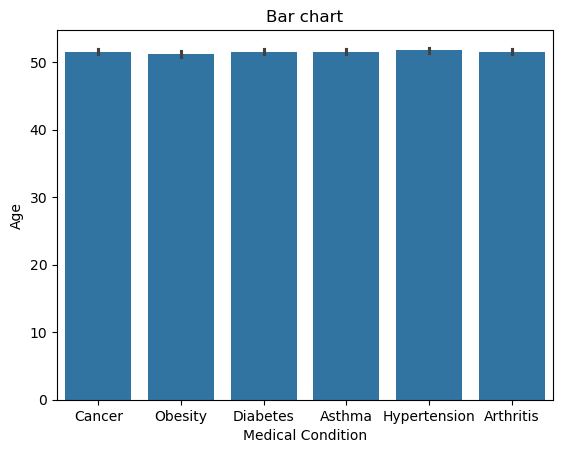

In [42]:
sns.barplot(x=df['Medical Condition'], y=df['Age'], data=df)
plt.title('Bar chart')
plt.show()

### Plot Histogram

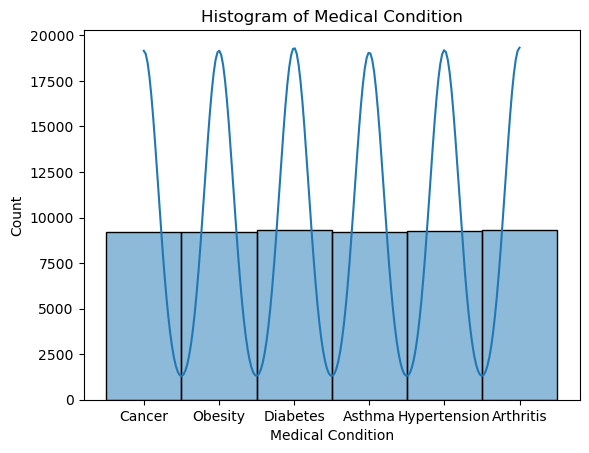

In [43]:
sns.histplot(x = df['Medical Condition'], data = df, bins = 5, kde = True)  # Bins represent the range of values
plt.title('Histogram of Medical Condition')
plt.show()

### Pie Chart

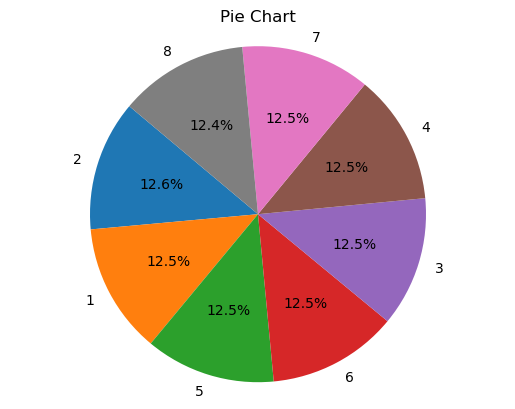

In [44]:
bt_count = df['Blood Type'].value_counts()
plt.pie(bt_count,labels=bt_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.axis('equal')               
plt.show()

## Finding Outliers using box plot

<Axes: >

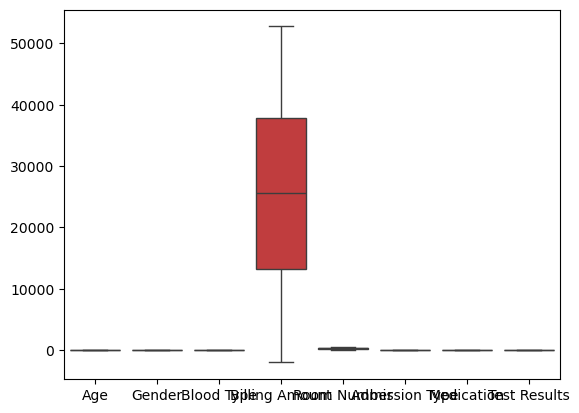

In [45]:
sns.boxplot(data = df)

## Correlation between all Numerical Columns

In [46]:
cr = df.select_dtypes(include = 'number').corr()
cr

,Age,Gender,Blood Type,Billing Amount,Room Number,Admission Type,Medication,Test Results
Age,1.000000,0.002002,-0.001174,-0.003832,-0.000720,0.002831,0.002380,0.001047
Gender,0.002002,1.000000,0.002712,-0.004827,0.006332,0.002776,-0.002728,0.000591
Blood Type,-0.001174,0.002712,1.000000,-0.000366,0.001674,-0.005507,0.005578,-0.004786
Billing Amount,-0.003832,-0.004827,-0.000366,1.000000,-0.002943,-0.003015,0.000955,0.002433
Room Number,-0.000720,0.006332,0.001674,-0.002943,1.000000,0.000774,-0.000611,-0.001800
Admission Type,0.002831,0.002776,-0.005507,-0.003015,0.000774,1.000000,-0.002286,0.004252
Medication,0.002380,-0.002728,0.005578,0.000955,-0.000611,-0.002286,1.000000,-0.001888
Test Results,0.001047,0.000591,-0.004786,0.002433,-0.001800,0.004252,-0.001888,1.000000


## Plot HeatMap

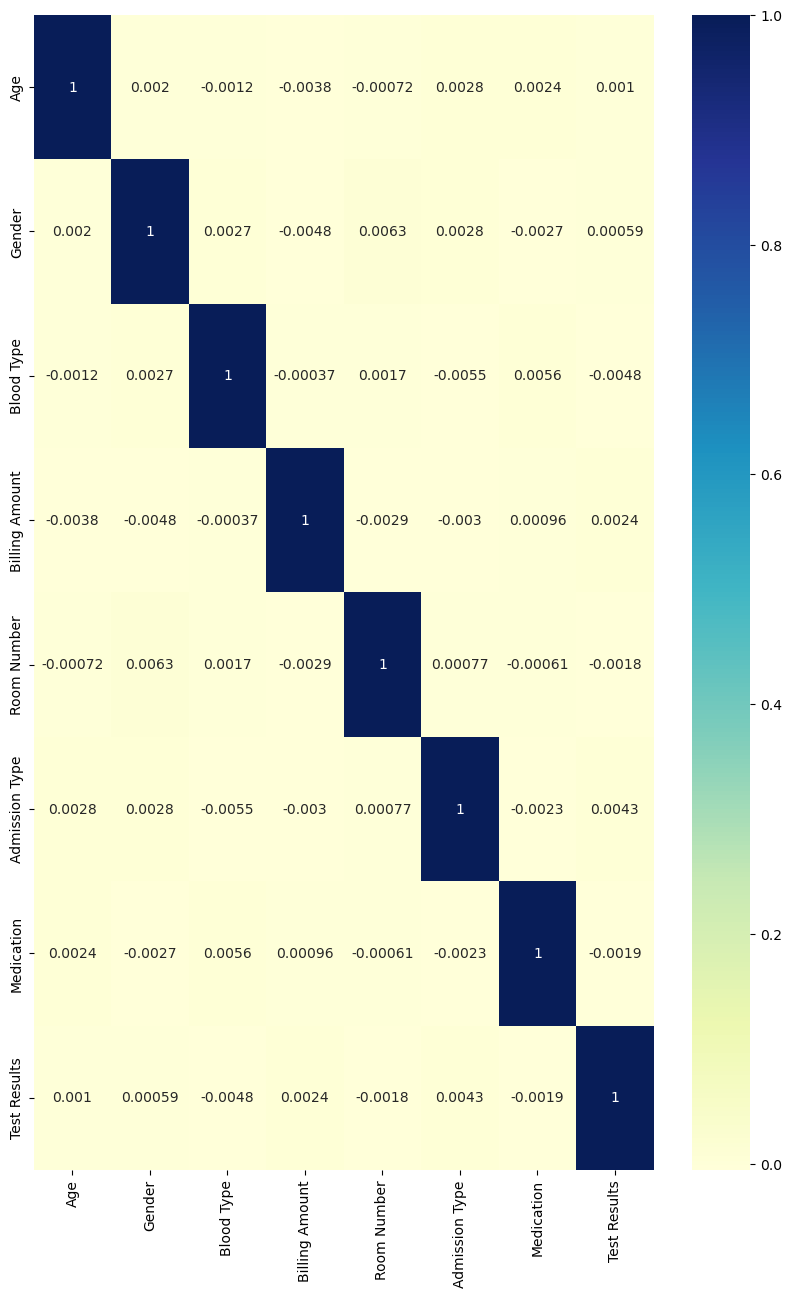

In [47]:
plt.figure(figsize=(10,15))
sns.heatmap(cr, annot=True, cmap='YlGnBu')
plt.show()

## Shape of Distribution Data

### Skewness¶

In [48]:
# Skewness for all numerical values
sk = df.select_dtypes(include = 'number').skew()
sk

Age              -0.005735
Gender            0.001730
Blood Type        0.003258
Billing Amount   -0.000978
Room Number      -0.011200
Admission Type    0.012764
Medication        0.003619
Test Results      0.008969
dtype: float64

### Kurtosis

In [49]:
k = df.select_dtypes(include = 'number').kurt()
k

Age              -1.185576
Gender           -2.000069
Blood Type       -1.236937
Billing Amount   -1.190630
Room Number      -1.194189
Admission Type   -1.496722
Medication       -1.300340
Test Results     -1.499230
dtype: float64

### Mean value for the numerical columns

In [50]:
mn = df.select_dtypes(include = 'number').mean()
mn

Age                  51.539459
Gender                1.499568
Blood Type            4.492703
Billing Amount    25539.316097
Room Number         301.134829
Admission Type        1.993045
Medication            2.996396
Test Results          1.995117
dtype: float64

In [51]:
pr = df['Age'].corr(df['Billing Amount'], method = 'pearson')
pr

-0.003831942118617671

## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN¶

In [52]:
pt = PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [53]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [54]:
df_transformed.skew()

Age              -0.126687
Gender            0.001730
Blood Type       -0.145255
Billing Amount   -0.187638
Room Number      -0.132367
Admission Type   -0.079983
Medication       -0.118121
Test Results     -0.081486
dtype: float64

## Plotting Hist plot

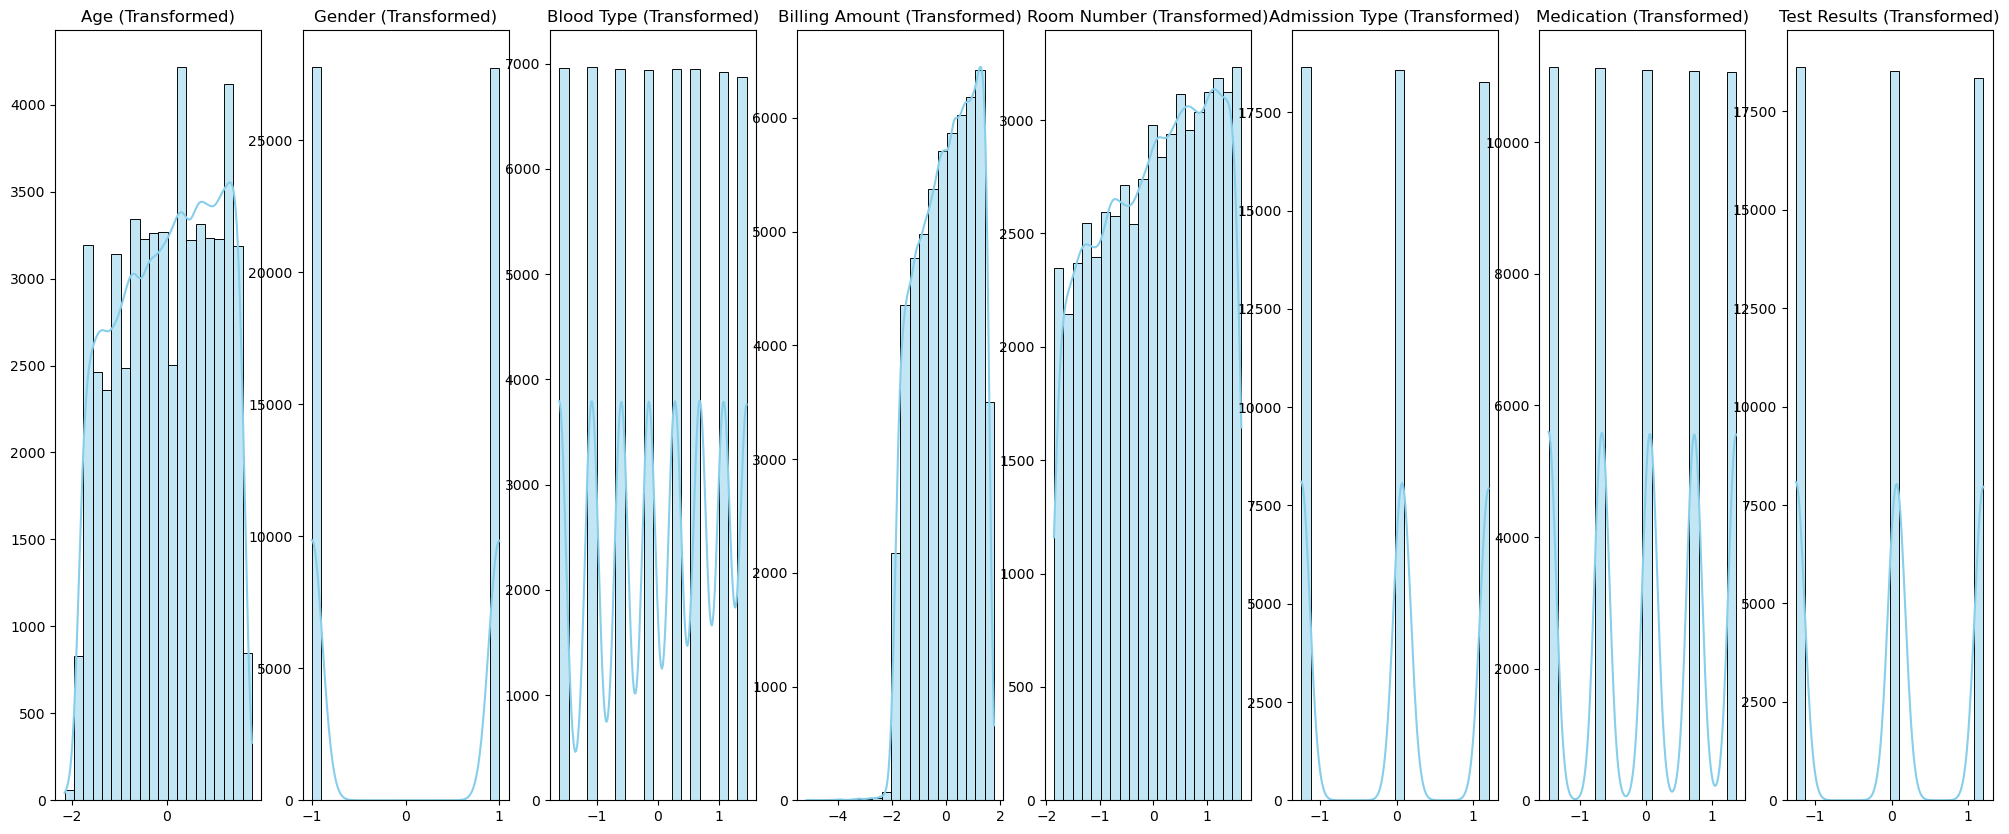

In [55]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

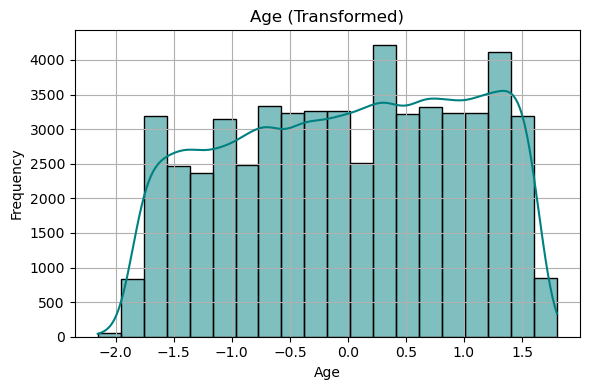

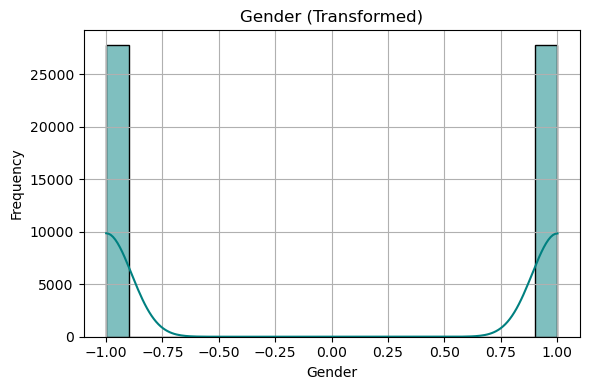

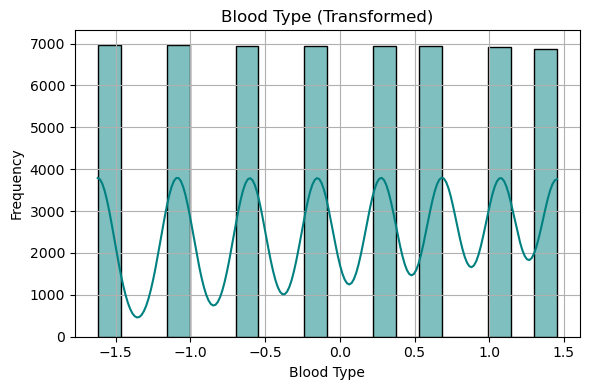

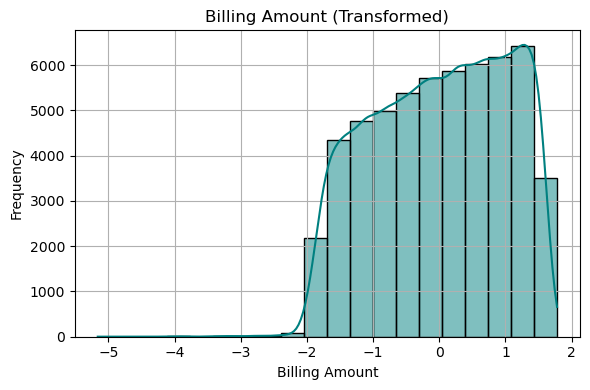

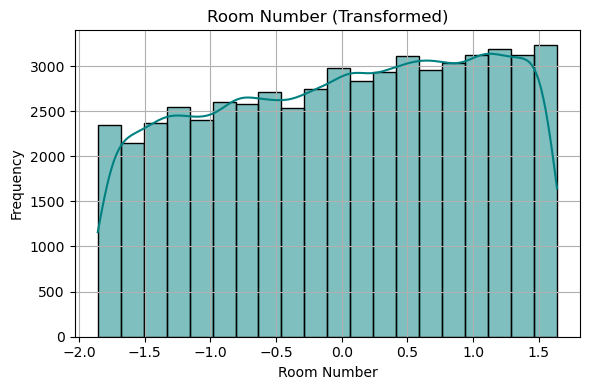

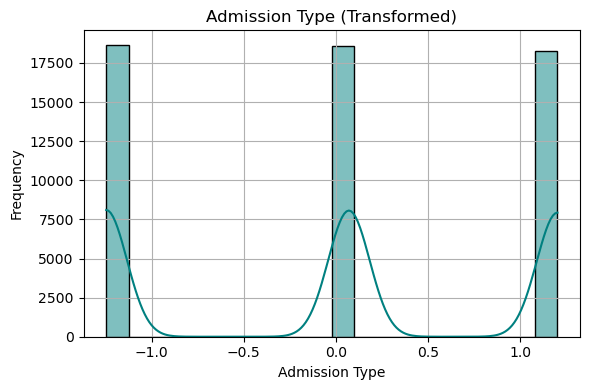

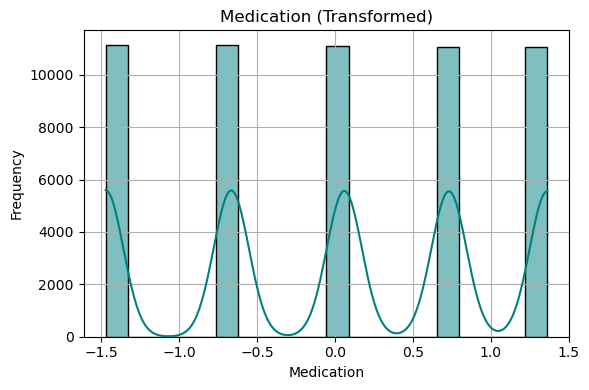

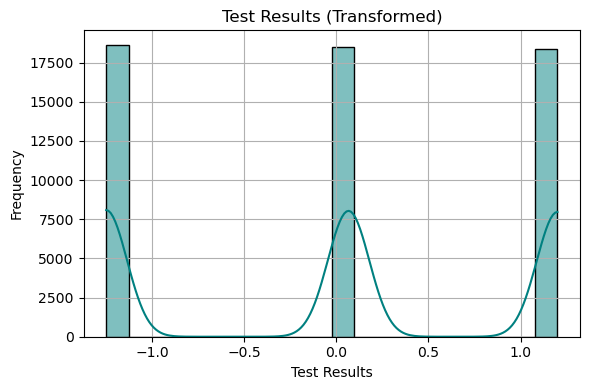

In [56]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Encoding target variable using Label encoder

In [57]:
df.dtypes

Name                   object
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type          int64
Discharge Date         object
Medication              int64
Test Results            int64
dtype: object

In [58]:
le = LabelEncoder()
df['Age']= le.fit_transform(df['Age'])
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,17,1,4,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,2,2024-02-02,4,2
1,LesLie TErRy,49,1,1,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,3,2019-08-26,2,3
2,DaNnY sMitH,63,2,2,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,3,2022-10-07,3,2
3,andrEw waTtS,15,2,7,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,1,2020-12-18,2,1
4,adrIENNE bEll,30,2,5,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,2,2022-10-09,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,29,2,7,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,1,2020-09-15,5,1
55496,KYle pEREz,48,2,6,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,1,2020-02-01,3,2
55497,HEATher WaNG,25,2,3,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,2,2020-08-10,2,1
55498,JENniFER JOneS,30,1,8,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,1,2019-05-31,2,1


In [59]:
df['Billing Amount']= le.fit_transform(df['Billing Amount'])
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,17,1,4,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18148,328,2,2024-02-02,4,2
1,LesLie TErRy,49,1,1,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33218,265,3,2019-08-26,2,3
2,DaNnY sMitH,63,2,2,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27375,205,3,2022-10-07,3,2
3,andrEw waTtS,15,2,7,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37562,450,1,2020-12-18,2,1
4,adrIENNE bEll,30,2,5,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,13517,458,2,2022-10-09,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,29,2,7,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,1660,417,1,2020-09-15,5,1
55496,KYle pEREz,48,2,6,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31014,316,1,2020-02-01,3,2
55497,HEATher WaNG,25,2,3,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27043,347,2,2020-08-10,2,1
55498,JENniFER JOneS,30,1,8,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32001,321,1,2019-05-31,2,1


## Encoding using One hot Encoder from sklearn.preprocessing

In [60]:
df.dtypes

Name                  object
Age                    int64
Gender                 int64
Blood Type             int64
Medical Condition     object
Date of Admission     object
Doctor                object
Hospital              object
Insurance Provider    object
Billing Amount         int64
Room Number            int64
Admission Type         int64
Discharge Date        object
Medication             int64
Test Results           int64
dtype: object

In [62]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)  # drop='first' if you want to avoid multicollinearity

In [72]:
encoded = ohe.fit_transform(df[['Gender']])
encodeddf = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(['Gender']))
encodeddf

,Gender_1,Gender_2
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
55495,0.0,1.0
55496,0.0,1.0
55497,0.0,1.0
55498,1.0,0.0


In [73]:
df_final = pd.concat([df.drop('Medical Condition', axis = 1), encodeddf], axis = 1)
df_final

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Gender_1,Gender_2
0,Bobby JacksOn,17,1,4,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18148,328,2,2024-02-02,4,2,1.0,0.0
1,LesLie TErRy,49,1,1,2019-08-20,Samantha Davies,Kim Inc,Medicare,33218,265,3,2019-08-26,2,3,1.0,0.0
2,DaNnY sMitH,63,2,2,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27375,205,3,2022-10-07,3,2,0.0,1.0
3,andrEw waTtS,15,2,7,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37562,450,1,2020-12-18,2,1,0.0,1.0
4,adrIENNE bEll,30,2,5,2022-09-19,Kathleen Hanna,White-White,Aetna,13517,458,2,2022-10-09,5,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,29,2,7,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,1660,417,1,2020-09-15,5,1,0.0,1.0
55496,KYle pEREz,48,2,6,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31014,316,1,2020-02-01,3,2,0.0,1.0
55497,HEATher WaNG,25,2,3,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27043,347,2,2020-08-10,2,1,0.0,1.0
55498,JENniFER JOneS,30,1,8,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32001,321,1,2019-05-31,2,1,1.0,0.0


In [74]:
print('Length of Encoded clean data frame', len(df_final))

Length of Encoded clean data frame 55500


## SMOTE Technique

In [86]:
smote = SMOTE(k_neighbors=1, random_state=42)

In [92]:
# Step 1: Separate numerical and categorical features
# First, fix the syntax error in your column selection (missing closing bracket)
numerical_features = df_final.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'Blood Type']

In [93]:
# Step 2: Use only numerical features for SMOTE
x = df_final[numerical_features]
y = df_final['Blood Type']

In [94]:
# Step 3: Apply SMOTE on numerical data only
x_smote, y_smote = smote.fit_resample(x, y)

In [95]:
print('Length of Y SMOTE', len(y_smote))

Length of Y SMOTE 55752


In [108]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df_final.describe(include='all').columns) if i != 'Blood Type')) 
balanced_df = balanced_df.drop(['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Date of Admission', 'Discharge Date'], axis =1)
balanced_df

,Age,Gender,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender_1,Gender_2
0,17,1,18148,328,2,4,2,1.000000,0.000000
1,49,1,33218,265,3,2,3,1.000000,0.000000
2,63,2,27375,205,3,3,2,0.000000,1.000000
3,15,2,37562,450,1,2,1,0.000000,1.000000
4,30,2,13517,458,2,5,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
55747,36,1,23540,230,2,4,2,0.287729,0.712271
55748,28,1,23700,129,1,2,2,0.851913,0.148087
55749,47,1,41240,246,2,3,1,0.002260,0.997740
55750,31,2,9633,187,2,4,3,0.000000,1.000000


In [109]:
balanced_df['Blood Type'] = y_smote

In [110]:
balanced_df.shape

(55752, 10)

In [111]:
balanced_df['Blood Type'].value_counts()

Blood Type
4    6969
1    6969
2    6969
7    6969
5    6969
6    6969
3    6969
8    6969
Name: count, dtype: int64

## Feature Selection

In [118]:
skb = SelectKBest(score_func = f_classif, k = 9)
y = balanced_df['Blood Type']
x = balanced_df.drop('Blood Type', axis =1)

In [119]:
x.columns

Index(['Age', 'Gender', 'Billing Amount', 'Room Number', 'Admission Type',
       'Medication', 'Test Results', 'Gender_1', 'Gender_2'],
      dtype='object')

In [120]:
y

0        4
1        1
2        2
3        7
4        5
        ..
55747    8
55748    8
55749    8
55750    8
55751    8
Name: Blood Type, Length: 55752, dtype: int64

In [121]:
x_new = skb.fit_transform(x, y)

In [122]:
selected_cols = x.columns[skb.get_support()]
selected_cols

Index(['Age', 'Gender', 'Billing Amount', 'Room Number', 'Admission Type',
       'Medication', 'Test Results', 'Gender_1', 'Gender_2'],
      dtype='object')

In [123]:
feature_scores = pd.DataFrame({ 
    'Feature': x.columns, 
    'Score': skb.scores_ 
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
8,Gender_2,2.088113
7,Gender_1,2.088113
1,Gender,1.889536
4,Admission Type,1.552462
2,Billing Amount,1.240486
5,Medication,1.105928
3,Room Number,0.807586
6,Test Results,0.719126
0,Age,0.468172


In [124]:
x_selected = x[selected_cols] 
x_selected

,Age,Gender,Billing Amount,Room Number,Admission Type,Medication,Test Results,Gender_1,Gender_2
0,17,1,18148,328,2,4,2,1.000000,0.000000
1,49,1,33218,265,3,2,3,1.000000,0.000000
2,63,2,27375,205,3,3,2,0.000000,1.000000
3,15,2,37562,450,1,2,1,0.000000,1.000000
4,30,2,13517,458,2,5,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
55747,36,1,23540,230,2,4,2,0.287729,0.712271
55748,28,1,23700,129,1,2,2,0.851913,0.148087
55749,47,1,41240,246,2,3,1,0.002260,0.997740
55750,31,2,9633,187,2,4,3,0.000000,1.000000


## Scaling
- Standard Scaler(0-1)
- Min-Max Scaler

In [125]:
ss = StandardScaler()

In [126]:
x_scaled = ss.fit_transform(x_selected)
x_scaled

array([[-1.0993659 , -0.99742046, -0.47309484, ...,  0.00734117,
         1.00002721, -1.00002721],
       [ 0.53386389, -0.99742046,  0.57117346, ...,  1.23274562,
         1.00002721, -1.00002721],
       [ 1.24840192,  1.00258621,  0.16628562, ...,  0.00734117,
        -1.0013363 ,  1.0013363 ],
       ...,
       [ 0.43178703, -0.99742046,  1.12705403, ..., -1.21806328,
        -0.99681419,  0.99681419],
       [-0.38482786,  1.00258621, -1.06313761, ...,  1.23274562,
        -1.0013363 ,  1.0013363 ],
       [ 0.17659487,  1.00258621,  0.93316799, ..., -1.21806328,
        -1.0013363 ,  1.0013363 ]])

## Training and Testing

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [128]:
print('X_Train shape: ', x_train.shape)
print('X_Test shape: ', x_test.shape)
print('Y_Train shape: ', y_train.shape)
print('Y_Test shape: ', y_test.shape)

X_Train shape:  (44601, 9)
X_Test shape:  (11151, 9)
Y_Train shape:  (44601,)
Y_Test shape:  (11151,)


In [129]:
y.value_counts()       # Imbalanced data

Blood Type
4    6969
1    6969
2    6969
7    6969
5    6969
6    6969
3    6969
8    6969
Name: count, dtype: int64